In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('aapl.csv',
                   header=None,
                   usecols=[1, 3, 4, 5, 6, 7],
                   names=['date', 'open', 'high', 'low', 'close', 'volume'])
data

,date,open,high,low,close,volume
0,28-01-2011,344.17,344.40,333.53,336.10,21144800
1,31-01-2011,335.80,340.04,334.30,339.32,13473000
2,01-02-2011,341.30,345.65,340.98,345.03,15236800
3,02-02-2011,344.45,345.25,343.55,344.32,9242600
4,03-02-2011,343.80,344.24,338.55,343.44,14064100
5,04-02-2011,343.61,346.70,343.51,346.50,11494200
6,07-02-2011,347.89,353.25,347.64,351.88,17322100
7,08-02-2011,353.68,355.52,352.15,355.20,13608500
8,09-02-2011,355.19,359.00,354.87,358.16,17240800
9,10-02-2011,357.39,360.00,348.00,354.54,33162400


In [3]:
def dmy2ymd(dmy):
    return '-'.join(dmy.split('-')[::-1])


data['date'] = data['date'].apply(dmy2ymd)
data['date'] = data['date'].astype('M8[D]')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    30 non-null     datetime64[ns]
 1   open    30 non-null     float64       
 2   high    30 non-null     float64       
 3   low     30 non-null     float64       
 4   close   30 non-null     float64       
 5   volume  30 non-null     int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 1.5 KB


In [4]:
ma_5 = np.zeros(data['close'].size - 4)
for i in range(ma_5.size):
    ma_5[i] = data['close'][i:i + 5].mean()

ma_5

array([341.642, 343.722, 346.234, 348.268, 351.036, 353.256, 355.326,
       356.786, 357.726, 358.72 , 359.472, 358.214, 354.1  , 350.644,
       346.594, 344.566, 345.096, 347.236, 349.136, 352.472, 354.84 ,
       355.27 , 356.56 , 356.63 , 354.052, 352.45 ])

In [5]:
data['ma5'] = pd.Series(ma_5, index=np.arange(4, 30))
data

,date,open,high,low,close,volume,ma5
0,2011-01-28,344.17,344.40,333.53,336.10,21144800,NaN
1,2011-01-31,335.80,340.04,334.30,339.32,13473000,NaN
2,2011-02-01,341.30,345.65,340.98,345.03,15236800,NaN
3,2011-02-02,344.45,345.25,343.55,344.32,9242600,NaN
4,2011-02-03,343.80,344.24,338.55,343.44,14064100,341.642
5,2011-02-04,343.61,346.70,343.51,346.50,11494200,343.722
6,2011-02-07,347.89,353.25,347.64,351.88,17322100,346.234
7,2011-02-08,353.68,355.52,352.15,355.20,13608500,348.268
8,2011-02-09,355.19,359.00,354.87,358.16,17240800,351.036
9,2011-02-10,357.39,360.00,348.00,354.54,33162400,353.256


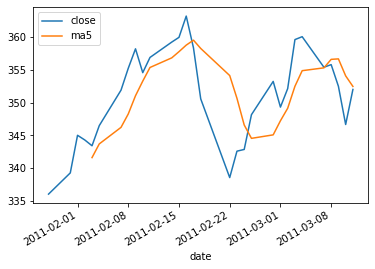

In [6]:
data.plot(x='date', y=['close', 'ma5'])

## 绘制布林带Example

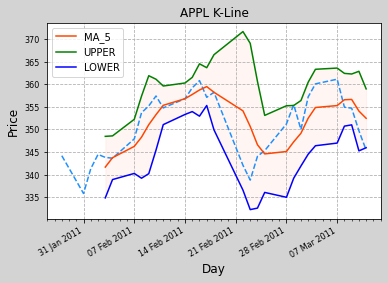

In [7]:
import numpy as np
import datetime as dt


#### 1.读取数据
# 日期格式转换函数: 将日月年转换为年月日格式
def dmy2ymd(dmy):
    dmy = str(dmy, encoding="utf-8")
    # 从指定字符串返回一个日期时间对象
    dat = dt.datetime.strptime(dmy, "%d-%m-%Y").date()  # 字符串转日期
    tm = dat.strftime("%Y-%m-%d")  # 日期转字符串
    return tm

dates, open_prices, highest_prices, lowest_prices, close_prices = \
    np.loadtxt("aapl.csv",  # 文件路径
               delimiter=",",  # 指定分隔符
               usecols=(1, 3, 4, 5, 6),  # 读取的列(下标从0开始)
               unpack=True,  # 拆分数据
               dtype="M8[D], f8, f8, f8, f8",  # 指定每一列的类型
               converters={1: dmy2ymd})  #

#### 2.绘制图像
import matplotlib.pyplot as mp
import matplotlib.dates as md

# 绘制k线图，x轴为日期
mp.figure("APPL K-Line", facecolor="lightgray")
mp.title("APPL K-Line")
mp.xlabel("Day", fontsize=12)
mp.ylabel("Price", fontsize=12)

# 获取坐标轴
ax = mp.gca()
# 设置主刻度定位器为周定位器(每周一显示刻度文本)
ax.xaxis.set_major_locator(md.WeekdayLocator(byweekday=md.MO))
ax.xaxis.set_major_formatter(md.DateFormatter("%d %b %Y"))  # %b表示月份简写
# 设置次刻度定位器为天定位器
ax.xaxis.set_minor_locator(md.DayLocator())
mp.tick_params(labelsize=8)
dates = dates.astype(md.datetime.datetime)

mp.plot(dates, open_prices, color="dodgerblue", linestyle="--")
mp.gcf().autofmt_xdate()  # 旋转、共享日期显示

# 绘制5日均值线
ma_5 = np.zeros(close_prices.size - 4)  # 均值数组
for i in range(ma_5.size):
    ma_5[i] = close_prices[i:i + 5].mean()  # 切片，求均值，并存入均值数组

mp.plot(
    dates[4:],  # 从第五天开始绘制
    ma_5,  # 数据
    color="orangered",
    label="MA_5")

# 计算上轨、下轨线
stds = np.zeros(ma_5.size)
for i in range(stds.size):
    stds[i] = close_prices[i:i + 5].std()  # 计算标准差
upper = ma_5 + 2 * stds  # 计算上轨
lower = ma_5 - 2 * stds  # 计算下轨
# 绘制线
mp.plot(dates[4:], upper, color="green", label="UPPER")
mp.plot(dates[4:], lower, color="blue", label="LOWER")
# 填充布林带
mp.fill_between(dates[4:],
                upper,
                lower,
                lower < upper,
                color="orangered",
                alpha=0.05)

mp.grid(linestyle="--")
mp.legend()
mp.show()